In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
def get_st_res(log_file='minmin8_resnet18.log',num_epochs=60):
    nat_accu,rob_accu,loss,accu_on_train,train_loss =[],[],[],[],[]

    with open(log_file,encoding='utf-8',mode='r') as f:
        res_lines = f.readlines()
        
        test_res=[]
        train_res=[]
        for i,line in enumerate(res_lines):
            line = line.split(' ')
            #print(line)
            if len(line)>2:
                if line[2]=='====================Eval':
                    test_res.append(res_lines[i+1].split('\t'))
                    train_res.append(res_lines[i-1].split('\t'))
        train_res=train_res[:num_epochs]
        test_res=test_res[:num_epochs]
        

        for i in range(num_epochs):
            nat_accu.append(float(test_res[i][3][8:]))
            rob_accu.append(float(test_res[i][-2][10:]))
            loss.append(float(test_res[i][7][9:]))
            accu_on_train.append(float(train_res[i][3][8:]))
            train_loss.append(float(train_res[i][5][9:]))


    res={'nat_accu':nat_accu,'rob_accu':rob_accu,'loss':loss,'accu_on_train':accu_on_train,'train_loss':train_loss}
    return res

In [15]:
num_epochs = 120
at_pretrain_plus_one=get_st_res('logs/at_pretrain_epsilon32_plue_one_resnet18_madrys.log',num_epochs=num_epochs)
std_pretrain_plus_one=get_st_res('logs/std_pretrain_epsilon32_plus_one_resnet18_madrys.log',num_epochs=num_epochs)
at_pretrain_near_swap = get_st_res('logs/at_pretrain_epsilon32_near_swap_resnet18_madrys.log',num_epochs=num_epochs)
std_pretrain_near_swap=get_st_res('logs/std_pretrain_epsilon32_near_swap_resnet18_madrys.log',num_epochs=num_epochs)
clean = get_st_res('logs/clean_resnet18_madrys.log',num_epochs=num_epochs)

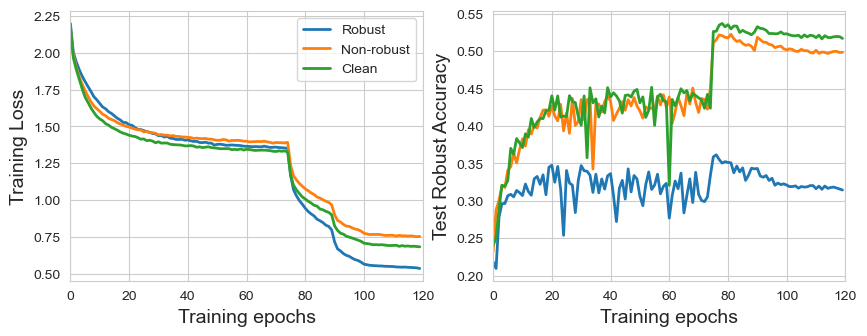

In [16]:
plt.figure(figsize=(10,3.5))
sns.set_style("whitegrid")
label_size=14
legend_size=10

plt.subplot(1,2,1)

df=pd.DataFrame(data={
    "epoch":range(num_epochs),
    "at_plus_one":at_pretrain_plus_one['train_loss'],
    "std_plus_one":std_pretrain_plus_one['train_loss'],
    "clean":clean['train_loss']
})
sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
ax.legend(['Robust', 'Non-robust','Clean'], loc='upper right',fontsize=legend_size)
ax.set_xlabel('Training epochs',fontsize=label_size)
ax.set_ylabel('Training Loss',fontsize=label_size)
ax.set_xlim([0,num_epochs])





plt.subplot(1, 2, 2)
df=pd.DataFrame(data={
    "epoch":range(num_epochs),
    "at_plus_one":at_pretrain_plus_one['rob_accu'],
    "std_plus_one":std_pretrain_plus_one['rob_accu'],
    
    "clean":clean['rob_accu']
})
sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
ax.legend(['Robust features', 'Non-robust features','Clean'], loc='upper right',fontsize=legend_size)
ax.get_legend().remove()
ax.set_xlabel('Training epochs',fontsize=label_size)
ax.set_ylabel('Test Robust Accuracy',fontsize=label_size)
ax.set_xlim([0,num_epochs])



#plt.suptitle('Poisoning Feature',x=0.5,y=0.97,fontsize=15)

#plt.show()

plt.savefig('figures/ATP_vs_STP.pdf', bbox_inches='tight',  pad_inches = 0)
plt.show()
